# SAMPLES COMPARISON AND PHILOGENETIC TREE

In [15]:
# Needed basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tqdm.notebook import tqdm
from matplotlib_venn import venn2
from matplotlib_venn import venn3
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

In [16]:
# Import the list of common mutations that are CLONAL in the compendium of the three callers in each tumor. Note that all melanoma mutations are considered clonal!!

mel_clmut_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_CCF_Purple_common_mutations.tsv.gz', sep="\t", header=0) #same data as mel_mut_df
sar_clmut_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Sar_CCF_Purple_clonal_mutations.tsv.gz', sep="\t", header=0)
lung_clmut_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Lung_CCF_Purple_clonal_mutations.tsv.gz', sep="\t", header=0)

In [17]:
mel_clmut_df.shape + sar_clmut_df.shape + lung_clmut_df.shape

(1062273, 26, 19595, 27, 19501, 27)

## 1. CLONAL MUTATION COMPARISON BETWEEN SAMPLES

### a. With inner merge

In [18]:
# Now merge based on "mut" column, in two-by-two comparisons since we want the common mutations in a minimum of two callers (how=inner)
mel_sar_cl_df = pd.merge(mel_clmut_df, sar_clmut_df, how ="inner", on=['mut'], suffixes=['_Mel','_Sar'])
sar_lung_cl_df = pd.merge(sar_clmut_df, lung_clmut_df, how ="inner", on=['mut'], suffixes=['_Sar','_Lung'])
mel_lung_cl_df = pd.merge(mel_clmut_df, lung_clmut_df, how ="inner", on=['mut'], suffixes=['_Sar','_Lung'])

In [19]:
mel_sar_cl_df.shape + sar_lung_cl_df.shape + mel_lung_cl_df.shape

(1, 52, 17965, 53, 2, 52)

In [20]:
common_cl_df = pd.merge(mel_sar_cl_df, lung_clmut_df, how ="inner", on=['mut']) # inner to check only in the three groups

In [21]:
common_cl_df

,CHROM_Mel,POS_Mel,ID_Mel,REF_Mel,ALT_Mel,QUAL_Mel,FILTER_Mel,INFO_Mel,FORMAT_Mel,NORMAL_Mel,...,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,CN,CCF,clonality_y
0,chr2,223246091,.,G,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=125,130|10,9;...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:131,0:7.537e-03:131:61,0:67,0:130,0:61,70,0,0",...,0,33,131,0.663265,SNV,Mutect_Strelka,sarcoma_lung,0.9976,0.993306,clonal


In [22]:
common_cl_df.shape

(1, 78)

### b. With outer merge (same result, but useful for outsider values in venn)

In [23]:
# Merge inner and use indicator to add a merge column
mel_sar_cl_df2 = pd.merge(mel_clmut_df, sar_clmut_df, how ="outer", on=['mut'], suffixes=['_Mel','_Sar'], indicator = True)
print(mel_sar_cl_df2.columns) # note that _merge column has been added
sar_lung_cl_df2 = pd.merge(sar_clmut_df, lung_clmut_df, how ="outer", on=['mut'], suffixes=['_Sar','_Lung'], indicator = True)
mel_lung_cl_df2 = pd.merge(mel_clmut_df, lung_clmut_df, how ="outer", on=['mut'], suffixes=['_Mel','_Lung'], indicator = True)

Index(['CHROM_Mel', 'POS_Mel', 'ID_Mel', 'REF_Mel', 'ALT_Mel', 'QUAL_Mel',
       'FILTER_Mel', 'INFO_Mel', 'FORMAT_Mel', 'NORMAL_Mel', 'TUMOR_Mel',
       't_AF_Mel', 'n_AF_Mel', 't_DP_Mel', 'n_DP_Mel', 't_alt_reads_Mel',
       'n_alt_reads_Mel', 't_ref_reads_Mel', 'n_ref_reads_Mel', 'VAF_Mel',
       'mut_type_Mel', 'Caller_intersec_Mel', 'SAMPLE_Mel', 'mut', 'CN_Mel',
       'CCF_Mel', 'CHROM_Sar', 'POS_Sar', 'ID_Sar', 'REF_Sar', 'ALT_Sar',
       'QUAL_Sar', 'FILTER_Sar', 'INFO_Sar', 'FORMAT_Sar', 'NORMAL_Sar',
       'TUMOR_Sar', 't_AF_Sar', 'n_AF_Sar', 't_DP_Sar', 'n_DP_Sar',
       't_alt_reads_Sar', 'n_alt_reads_Sar', 't_ref_reads_Sar',
       'n_ref_reads_Sar', 'VAF_Sar', 'mut_type_Sar', 'Caller_intersec_Sar',
       'SAMPLE_Sar', 'CN_Sar', 'CCF_Sar', 'clonality', '_merge'],
      dtype='object')


In [24]:
# Extract only both from mel_sar
mel_sar_cl_df2 = mel_sar_cl_df2[mel_sar_cl_df2['_merge'] == 'both']

# Merge common mel-sar with lung to obtain the common mutation in all groups 

common_cl2 = pd.merge(mel_sar_cl_df2, lung_clmut_df, how ="inner", on=['mut']) # note here that we use inner to only know those common mutations and skip repeated column names problem

In [25]:
common_cl2

,CHROM_Mel,POS_Mel,ID_Mel,REF_Mel,ALT_Mel,QUAL_Mel,FILTER_Mel,INFO_Mel,FORMAT_Mel,NORMAL_Mel,...,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,CN,CCF,clonality_y
0,chr2,223246091.0,.,G,A,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=125,130|10,9;...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:131,0:7.537e-03:131:61,0:67,0:130,0:61,70,0,0",...,0,33,131,0.663265,SNV,Mutect_Strelka,sarcoma_lung,0.9976,0.993306,clonal


In [26]:
mel_sar_cl_df2.groupby('_merge').size()

/tmp/jobs/efiguerola/9247450/ipykernel_4778/1286828068.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mel_sar_cl_df2.groupby('_merge').size()


_merge
left_only     0
right_only    0
both          1
dtype: int64

In [27]:
sar_lung_cl_df2.groupby('_merge').size()

/tmp/jobs/efiguerola/9247450/ipykernel_4778/3914489256.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sar_lung_cl_df2.groupby('_merge').size()


_merge
left_only      1630
right_only     1536
both          17965
dtype: int64

In [28]:
mel_lung_cl_df2.groupby('_merge').size()

/tmp/jobs/efiguerola/9247450/ipykernel_4778/2686326275.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mel_lung_cl_df2.groupby('_merge').size()


_merge
left_only     1062271
right_only      19499
both                2
dtype: int64

In [29]:
common_cl2.groupby('_merge').size()

/tmp/jobs/efiguerola/9247450/ipykernel_4778/3919453321.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  common_cl2.groupby('_merge').size()


_merge
left_only     0
right_only    0
both          1
dtype: int64

### Venn diagrams from inner merge

In [30]:
# Check dimensions of these lists of mutations
len(mel_clmut_df)
len(sar_clmut_df)
len(lung_clmut_df)
len(common_cl_df)
# Convert mutations to lists:

mel_clmut_df= mel_clmut_df['mut'].tolist()
sar_clmut_df= sar_clmut_df['mut'].tolist()
lung_clmut_df= lung_clmut_df['mut'].tolist()

In [31]:
set_mel2 = set(mel_clmut_df)
set_sar2 = set(sar_clmut_df)
set_lung2 = set(lung_clmut_df)

Text(0.5, 1.0, 'Clonal mutation comparison between samples')

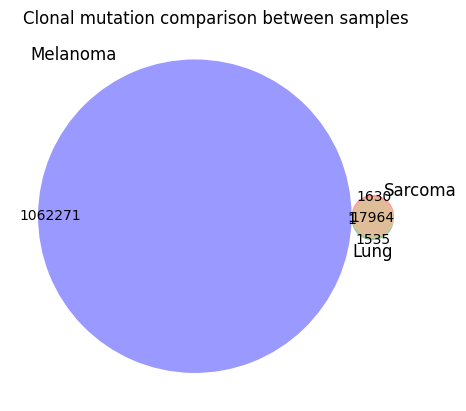

In [32]:
venn3([set_mel2,set_sar2, set_lung2],set_labels=['Melanoma','Sarcoma','Lung'], set_colors=("blue", "red", "green"))
plt.title('Clonal mutation comparison between samples')

In [33]:
# Obtain the list of mutations shared between samples
mel_sar_list =set_mel2.intersection(set_sar2) 
sar_lung_list = set_sar2.intersection(set_lung2)
mel_lung_list = set_mel2.intersection(set_lung2)
mel_sar_lung_list = mel_sar_list.intersection(set_lung2)

In [34]:
print(mel_sar_lung_list)

{'chr2_223246091_G_A'}


In [35]:
# Since there is one common mutation in all samples, we should substract this mutation to samples
mel_sar_number = len(mel_sar_list) - len(common_cl2)
sar_lung_number = len(sar_lung_list) - len(common_cl2)
mel_lung_number = len(mel_lung_list)- len(common_cl2)
common_number = len(common_cl2)

# Safe in a new variable the unique mutations for each sample
sar_only_number = len(sar_clmut_df) - common_number - sar_lung_number
mel_only_number = len(mel_clmut_df) - common_number - mel_lung_number
lung_only_number = len(lung_clmut_df) - common_number - sar_lung_number - mel_lung_number

In [36]:
print('Exclusive common mutations in sarcoma-melanoma samples:',mel_sar_number)
print('Exclusive common mutations in sarcoma-lung samples:', sar_lung_number)
print('Exclusive common mutations in melanoma-lung samples:', mel_lung_number)
print('Exclusive common mutations in melanoma-sarcoma-lung samples:',common_number)

Exclusive common mutations in sarcoma-melanoma samples: 0
Exclusive common mutations in sarcoma-lung samples: 17964
Exclusive common mutations in melanoma-lung samples: 1
Exclusive common mutations in melanoma-sarcoma-lung samples: 1


In [37]:
# Check if each value is correct in each sample
if len(mel_clmut_df) == mel_sar_number + common_number + mel_only_number + mel_lung_number:
    print('Numbers for Melanoma are correct')
else:
    print('Error in Melanoma values')

if len(sar_clmut_df) == sar_lung_number + common_number + sar_only_number + mel_sar_number:
    print('Numbers for Sarcoma are correct')
else:
    print('Error in Sarcoma values')

if len(lung_clmut_df) == sar_lung_number + common_number + lung_only_number + mel_lung_number:
    print('Numbers for Lung are correct')
else:
    print('Error in Lung values')


Numbers for Melanoma are correct
Numbers for Sarcoma are correct
Numbers for Lung are correct


### Export mutations into the dataframe

In [26]:
def get_common_mut(row):
    if row['mut'] == mel_sar_lung_list: # this way sets the shared value first, and all the others the non shared in the three samples
        return 'melanoma-sarcoma-lung'
    elif row['mut'] in mel_sar_list:
        return 'melanoma-sarcoma'
    elif row['mut'] in sar_lung_list:
        return 'sarcoma-lung'
    elif row['mut'] in mel_lung_list:
        return 'melanoma-lung'
    else:
        return 'unique'

from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()
mel_clmut_df['mutation-shared'] = mel_clmut_df.progress_apply(get_common_mut, axis=1)
sar_clmut_df['mutation-shared'] = sar_clmut_df.progress_apply(get_common_mut, axis=1)
lung_clmut_df['mutation-shared'] = lung_clmut_df.progress_apply(get_common_mut, axis=1)


AttributeError: 'list' object has no attribute 'progress_apply'

In [ ]:
# Check format in table of some mutations
sar_clmut_df.loc[sar_clmut_df["mut"] == 'chr2_223246091_G_A']

## 2. CONSTRUCTION OF THE PHILOGENETIC TREE

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import numpy as np
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

In [39]:
-mel_only_number, -common_number, -sar_lung_number, -sar_only_number, -lung_only_number

(-1062271, -1, -17964, -1630, -1535)

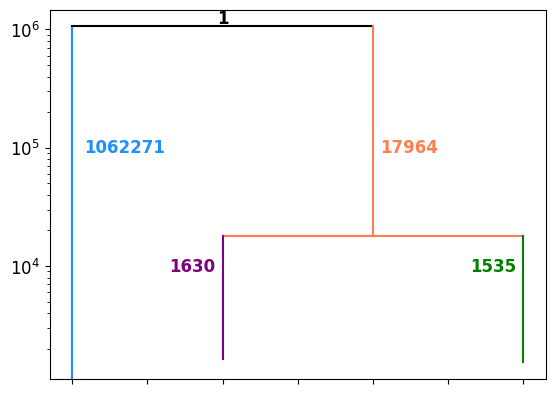

In [212]:
# Given x and y data
x1 = [0,0,0]
y1 = [0, mel_only_number,0]

x2 = [0,1,1,2]
y2 = [mel_only_number, mel_only_number, mel_only_number+common_number,mel_only_number]
x3 = [2, 2,1,3] 
y3 = [mel_only_number, sar_lung_number,sar_lung_number,sar_lung_number]
x4 = [1,1] 
y4 = [sar_only_number,sar_lung_number]
x5 = [3,3]
y5 = [sar_lung_number, lung_only_number]
      
# line colour is blue 
plt.plot(x1,y1, color = 'dodgerblue') 

# line colour is green 
plt.plot(x2,y2, color = 'black') 

# line colour is green 
plt.plot(x3,y3, color = 'coral' ) 

# line colour is green 
plt.plot(x4,y4, color = 'purple') 

# line colour is green 
plt.plot(x5,y5, color = 'green', ) 

# # line colour is green 
# plt.plot(x6,y6, color = 'dodgerblue', linestyle = '--') 
plt.yscale('log')
  
# # line colour is red 
# plt.axhline(y = 2, color = 'r', linestyle = 'dashed')     

# # plt.plot(x,y)
# plt.gca()

plt.xticks(visible=False)

plt.yticks(fontsize=12)
plt.text(0.35, 100000, mel_only_number, horizontalalignment='center', verticalalignment='center', color='dodgerblue',fontsize=12, weight='bold')
plt.text(1, 1230000, common_number, horizontalalignment='center', verticalalignment='center', color='black',fontsize=12, weight='bold')
plt.text(2.24, 100000, sar_lung_number, horizontalalignment='center', verticalalignment='center', color='coral',fontsize=12, weight='bold')
plt.text(0.8, 10000, sar_only_number, horizontalalignment='center', verticalalignment='center', color='purple',fontsize=12, weight='bold')
plt.text(2.8, 10000, lung_only_number, horizontalalignment='center', verticalalignment='center', color='green',fontsize=12, weight='bold')

plt.show()

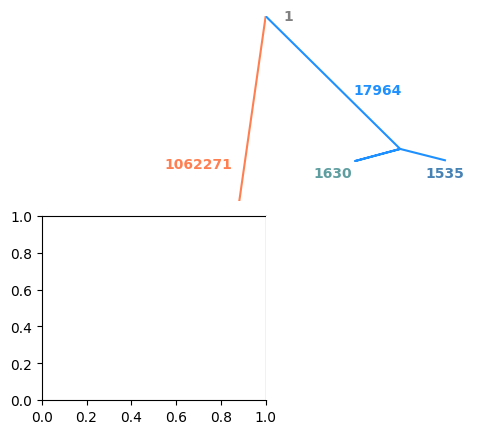

In [36]:
# Define data
x1 = [-0.05,0]
y1 = [-mel_only_number,0]
x2 = [0, 0, 0.6, 0.4, 0.6, 0.8]
y2 = [0, -common_number, -sar_lung_number, -sar_lung_number-sar_only_number, -sar_lung_number, -sar_lung_number-lung_only_number]
x3 = [-0.1,-0.05]
y3 = [-mel_only_number,-0.4]

# Create scatterplot with 4 plots, 2 above 2 below
f, ((ay, ay2,), (ax1, ax2)) = plt.subplots(2, 2)

# Plot the data on all axes using dots. Note below right graph is empty of data (ax2)
ay.scatter(x1, y1, s=5, c="white") # upper left
ay2.scatter(x2, y2, s=10,c="white")  # upper right 
ax.scatter(x3, y3, s=5, c="white") # below left

# Set limits on graph Y-axes (each depends on data values)
ay.set_ylim(-50000, 0) 
ay2.set_ylim(-25000, 0) 
ax.set_ylim(-500000, 0) 
ax2.set_ylim(-1500000, -500000) 

# Set limits on graph Y-axes (each depends on data values)
ay.set_xlim(-0.02, 0)
ay2.set_xlim(0, 1)
ax.set_xlim(-0.4, 0)
ax2.set_xlim(0, 1)

# Hide top, bottom, left and right borders between graphs
ay.spines['bottom'].set_visible(False)
ay.spines['top'].set_visible(False)
ay2.spines['bottom'].set_visible(False)
ay2.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)
ax2.spines['right'].set_visible(False)
ay.spines['right'].set_visible(False)
ay2.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax2.spines['left'].set_visible(False)
ay.spines['left'].set_visible(False)
ay2.spines['left'].set_visible(False)

# Hide axis numbers
ay.get_xaxis().set_visible(False)
ay.get_yaxis().set_visible(False)
ay2.get_xaxis().set_visible(False)
ay2.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

# Hide ticks in axes
ay2.xaxis.tick_top()
ay.xaxis.tick_top()
ax.xaxis.tick_top()
ax2.xaxis.tick_top()

# Hide labels on graphs
ay.tick_params(labeltop=False)  
ay2.tick_params(labeltop=False)  
ax.tick_params(labeltop=False)  
ax2.tick_params(labeltop=False) 

# Color line connectors in each plot
ay.plot(x1, y1, 'coral')
ay2.plot(x2, y2, 'dodgerblue')
ax.plot(x3, y3, 'coral')
ax2.plot(x3, y3, 'coral')
# Adjust the separation between graphs
plt.subplots_adjust(left=0.2,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.0005, # this joins the two upper graphs together
                    hspace=0.08)

# Show text in graph, numbers are the position on each graph
ay.text(0.7, 0.2, mel_only_number, horizontalalignment='center', verticalalignment='center', transform=ay.transAxes, color='coral', fontsize=10, weight='bold')
ay2.text(0.1, 1, common_number, horizontalalignment='center', verticalalignment='center', transform=ay2.transAxes, color='grey', weight='bold')
ay2.text(0.8, 0.15, lung_only_number, horizontalalignment='center', verticalalignment='center', transform=ay2.transAxes, color = 'steelblue', fontsize=10, weight='bold')
ay2.text(0.5, 0.6, sar_lung_number, horizontalalignment='center', verticalalignment='center', transform=ay2.transAxes, color='dodgerblue', fontsize=10, weight='bold')
ay2.text(0.3, 0.15, sar_only_number, horizontalalignment='center', verticalalignment='center', transform=ay2.transAxes, color='cadetblue', fontsize=10, weight='bold')

plt.show()

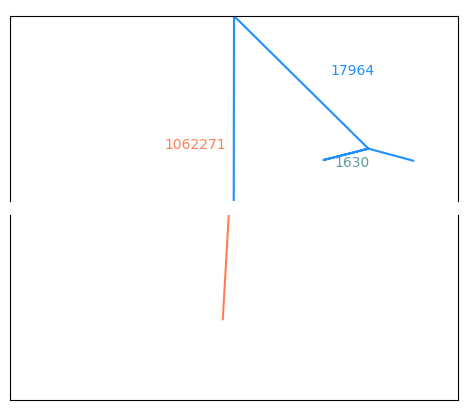

In [32]:
# define data
x = [-0.05, 0, 0, 0, 0.6, 0.4,0.6,0.8]
y = [-mel_only_number, 0, 0, -common_number, -sar_lung_number, -sar_lung_number-lung_only_number,-sar_lung_number ,-sar_lung_number-sar_only_number]

# create scatterplot
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# plot the data on both axes using dots
ax.scatter(x, y, s=5, c= 'white')
ax2.scatter(x, y, s=5, c= 'white')


# zoom-in / limit the view to different portions of the data
ax.set_ylim(-25000, 0)  # ylim upper graph
ax2.set_ylim(-1500000, -500000)  # ylim lower graph
ax2.set_xlim(-1, 1)
ax2.set_xlim(-1, 1)
# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()
ax.plot(x, y, 'dodgerblue')
ax2.plot(x, y, 'coral')
# Hide axes ticks and labels
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax2.get_xaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

plt.subplots_adjust(left=0.2,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.0005, 
                    hspace=0.08)
# Show texts
ax.text(0.3, 0.1, mel_only_number, horizontalalignment='center', verticalalignment='center', transform=ay.transAxes, color='coral')
ax.text(0.5, 1, common_number, horizontalalignment='center', verticalalignment='center', transform=ay2.transAxes, color='grey')
ax.text(0.8, 0.2, lung_only_number, horizontalalignment='center', verticalalignment='center', transform=ay2.transAxes, color = 'steelblue')
ax.text(0.0005, 0.5, sar_lung_number, horizontalalignment='center', verticalalignment='center', transform=ay2.transAxes, color='dodgerblue')
ax.text(0.0001, 0.001, sar_only_number, horizontalalignment='center', verticalalignment='center', transform=ay2.transAxes, color='cadetblue')


plt.show()



In [ ]:
# # Import the list of common mutations (clonal and subclonal) in the compendium of the three callers in each tumor
# mel_mut_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_List_common_mutations_callers.tsv.gz', sep="\t", header=0)
# sar_mut_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Sar_List_common_mutations_callers.tsv.gz', sep="\t", header=0)
# lung_mut_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Lung_List_common_mutations_callers.tsv.gz', sep="\t", header=0)

In [ ]:
# mel_mut_df.shape + sar_mut_df.shape + lung_mut_df.shape

## 3. CALCULATE % OF MUTATION REDUCTION UPON CLONAL MUTATION FILTER

In [1]:
# Calculate the mean mutation rate in each sample with the three callers

mean_mel = (1079488 + 1279052 + 1013333)/3
mean_sar = (25860 + 26140 + 21809)/3
mean_lung = (23011 + 24072 + 20454)/3 
print(mean_mel, mean_sar, mean_lung)

1123957.6666666667 24603.0 22512.333333333332


In [2]:
# Calculate the number of targets that are reduced upon caller filter (at least mutation has to be in 2 of the 3 callers)
mel_red = mean_mel - 1062273
sar_red = mean_sar - 24295
lung_red = mean_lung - 22125
print(mel_red, sar_red, lung_red)

61684.666666666744 308.0 387.3333333333321


In [3]:
percent_mel = mel_red * 100 /mean_mel
percent_sar = sar_red * 100 / mean_sar
percent_lung = lung_red * 100 / mean_lung

In [4]:
from decimal import Decimal
import decimal

percent_mel = round(Decimal(percent_mel), 3)
percent_sar = round(Decimal(percent_sar),3)
percent_lung = round(Decimal(percent_lung),3)  

In [6]:
print(percent_mel, percent_sar, percent_lung)

5.488 1.252 1.721
